# Question : 월별 방문자 수는 어떻게 변하는가?

### Import 

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings 

plt.rcParams['font.family'] = 'AppleGothic'
warnings.filterwarnings('ignore')

### Load

In [3]:
file_path = './data'

df = pd.read_csv(file_path + '/billiards_processing.csv')
df.head()

,닉네임,핸디,에버리지,날짜,종일,주간,야간,심야
0,도치,32,0.936,2023-04-01,0,1,0,0
1,큐사리,30,0.865,2023-04-01,0,1,0,0
2,레쓰비,30,0.797,2023-04-01,1,0,0,0
3,이장님,30,0.778,2023-04-01,0,1,0,0
4,서병관,30,0.723,2023-04-01,0,0,0,0


### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4641 entries, 0 to 4640
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   닉네임     4641 non-null   object 
 1   핸디      4641 non-null   int64  
 2   에버리지    4641 non-null   float64
 3   날짜      4641 non-null   object 
 4   종일      4641 non-null   int64  
 5   주간      4641 non-null   int64  
 6   야간      4641 non-null   int64  
 7   심야      4641 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 290.2+ KB


### Type Conversion

In [58]:
# '날짜' 컬럼을 날짜 타입으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')

# Check
# df.info()

### 월별 방문자 수 변화

In [63]:
# '날짜'에서 월을 추출하여 새로운 열 생성
df['월'] = df['날짜'].dt.month

# 각 월별 방문 수 합산 (종일, 주간, 야간, 심야 중 하나라도 방문한 경우를 방문로 간주)
df['방문'] = (df[['종일', '주간', '야간', '심야']].sum(axis=1) > 0).astype(int)

# 월별 방문 수 집계
monthly_visits = df.groupby('월')['방문'].sum().reset_index()

# Result
monthly_visits

,월,방문
0,4,1052
1,5,1098
2,6,1114


#### 시각화

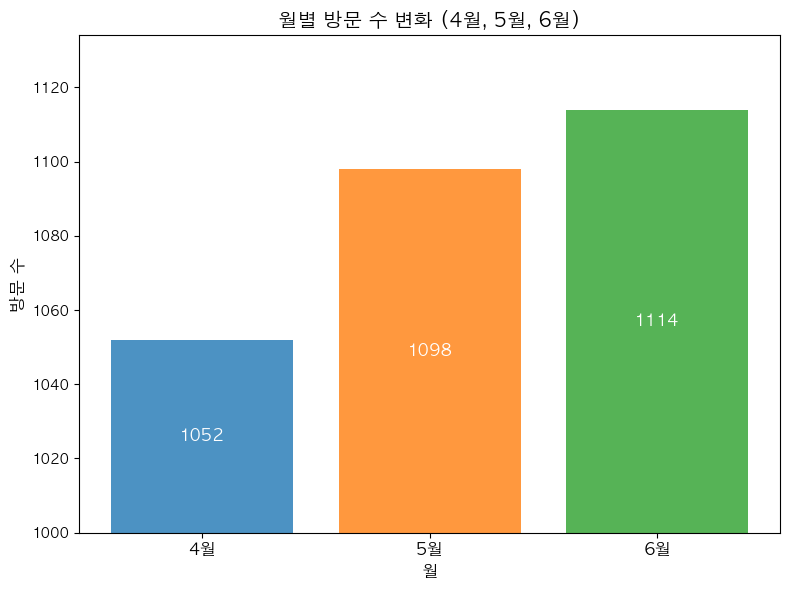

In [66]:
plt.figure(figsize=(8, 6))

bars = plt.bar(monthly_visits['월'], monthly_visits['방문'], color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8)

plt.title('월별 방문 수 변화 (4월, 5월, 6월)', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('방문 수', fontsize=12)
plt.xticks([4, 5, 6], ['4월', '5월', '6월'], fontsize=12)
plt.ylim(1000, monthly_visits['방문'].max() + 20)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - (yval - 1000) / 2, 
             int(yval), ha='center', va='center', color='white', fontsize=12)
    
plt.tight_layout()
plt.show()

#### 통계적 검정
- 귀무가설(H0) : 4월, 5월, 6월의 방문 수 평균에 유의미한 차이가 없다.
- 대립가설(H1) : 4월, 5월, 6월의 방문 수 평균에 유의미한 차이가 있다.

In [67]:
# 4월, 5월, 6월 방문 데이터 추출
April = df[df['월'] == 4]['방문']
May = df[df['월'] == 5]['방문']
June = df[df['월'] == 6]['방문']

# ANOVA 검정
f_statistic, p_value = stats.f_oneway(April, May, June)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# 유의수준 0.05로 유의미한 차이가 있는지 확인
if p_value < 0.05:
    print("귀무가설 기각")
else:
    print("귀무가설 채택")

F-statistic: 3.4578354916205165
P-value: 0.03157909016328504
귀무가설 기각
